## Introduction
This report aims to communicate the exploration findings of the Titanic passenger data<sup>[1](#fn1)</sup> to determine possible factors influencing survivability. This dataset contains passenger information of 891 (out of 2224) passengers and crew on board the Titanic. `titanic-data.csv` was first downloaded from Udacity & cleansed for missing values.

### Questions Posed
- Who were the passengers on board the Titanic?
- Does gender influence survivability?
- Does passenger class influence survivability?
- Does travel group size or number of family members influence survivability?
- Does age influence survivability?

### Investigation Method 

To answer the first questions - who were the passengers on-board the Titanic, an exploration of multiple variables in the dataset were conducted and detailed in the Exploration section. The first part of the exploration intends to discover the data captured, to assist with further investigation. With these initial findings, intermediate steps were taken to cluster / group the data for the treatment of subsequent questions.

The subsequent questions attempt to find out if factors influencing survivability are strong. Both dependent variables (family/group size) and independent variables (gender and age) were analysed.

Note that this reports aims to provide an exploration of the potential factors for further statistical analysis of significance.

### Changelog

v2.0
- Refined the data-set questions/hypothesis

v1.0
- Initial submission

### References
<a name="fn1">[1]</a>: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

<a name="fn2">[2]</a>: [Sinking of the RMS Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic)

<a name="fn3">[3]</a>: [Titanic Fare Data](http://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html)

## Data Wrangling
This section shows how the dataset was imported into Jupyter notebook and cleaned for analysis.

### Importing Dataset
`titanic-dataset.csv` was imported into Jupyter notebooks via Pandas.

In [1]:
# import all required modules for this analysis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# read CSV data into Pandas dataframe
titanic_df = pd.read_csv('titanic-data.csv')

# list some rows from the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


With the dataset successfully loaded into the pandas dataframe `titanic_df`, column counts can be made to check for missing values

In [2]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Handling Missing Values

From the column counts, it seems that `Age`, `Cabin`, and `Embarked` columns have missing values. Let us look at `Age`.

In [3]:
# list some rows with null Ages
titanic_df[titanic_df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


There are 177 missing values from Age column, with no obvious pattern. The 3 possible steps to handle the missing values would be to either ignore the missing values, ignore the entire rows containing the missing values, or substitute the mean for the missing values.

As the proportion of missing ages is high (almost 20%) and `Age` could represent an important aspect of a passenger, it may not be appropriate to ignore or drop the passenger records where `Age` is missing. Further exploration depending on the analysis, is required to determine how the missing `Age` records can be interpreted or substituted. This will be dealt with later in the exploration.

Exploring `Cabin` below,

In [4]:
# list the number of rows that have Cabin values
len(titanic_df[titanic_df['Cabin'].notnull()])

204

For `Cabin`, it is observed that only 204 records are populated. That means only approximately 23% of the 891 records have `Cabin` data. Since `Cabin` numbers provide an indication of the location of the passenger at the time of sinking (circa 2340h<sup>[2](#fn2)</sup>), it could still be useful to analyse this variable for patterns separately.

However, without additional information external to the dataset, to rebuild or interpolate the missing `Cabin` information for the other passengers would be challenging. One possibility would be to estimate the `Cabin` variable based on `Pclass`, `Ticket`, and `Fare` variables through machine learning - which is beyond the scope of this study.

For `Embarked`,

In [5]:
# list the rows with missing Embarkation port
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Only 2 records have `Embarked` as null. Interestingly, the 2 records seem to be somewhat related. Both passengers survived, are female, and are likely travelling together (same ticket and cabin), although they are not of parent/child relation. If the assumption that they are travelling together is true, it is likely that they embarked at the same port. Given these factors, the modal port of embarkation is imputed.

In [6]:
# list the modal embarkation port
titanic_df[['Embarked', 'PassengerId']].groupby('Embarked').count()

,PassengerId
Embarked,
C,168
Q,77
S,644


In [7]:
# impute the missing values with "S'; note that .fillna() can be used also
titanic_df.set_value(61, 'Embarked', 'S')
titanic_df.set_value(829, 'Embarked', 'S')

# check that all Embarked values are set
titanic_df['Embarked'].count()

891

## Who were the passengers?

This section explores the passengers on-board the titanic, based on the sample of passenger data. By gender, there are 314 female and 577 male passengers.

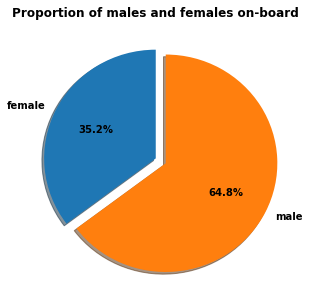

In [8]:
# get the number of male and female passengers
sizes = titanic_df.loc[:, ['PassengerId', 'Sex']].groupby('Sex').count()

plt.figure(figsize=(5,5))
plt.title('Proportion of males and females on-board')
plt.pie(sizes, explode=(0, 0.1), labels=sizes.index.values, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### Passenger Class and Fares

Although the currency paid at the time (1912) was pre-decimalised, the fare data is recorded in this dataset are decimalised amounts <sup>[3](#fn3)</sup>. The mean fare paid by each passenger is £32.2 and median fare is £14.5.

The passengers are split into 3 socio-economic classes - from First (highest) to Third. The following breakdown shows the distribution of fares.

Third-class passengers make up more than half of the total passengers (55%), with the first and second classes roughly in equal proportion (24% and 21% respectively).

Comparing median (50th percentile) fares, first-class passengers pay 4 times the fare compared to second, and almost 8 times compared to third.

In all classes, the standard deviation of fares are relatively large considering the median fare prices - indicating that prices vary widely.

In [9]:
print('Mean fare  : £{:0.2f} \nMedian fare: £{:0.2f}'.format(
    titanic_df['Fare'].mean(), titanic_df['Fare'].median()))

# describe the fare, grouped by Pclass
titanic_df.groupby('Pclass')['Fare'].describe()

Mean fare  : £32.20 
Median fare: £14.45


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


### Clustering Passengers

As cruise ship passengers generally do not travel alone, some form of clustering the passengers into logical groups will be helpful in analysis.

**Family Members**

By summing up the `SibSp` and `Parch` columns, we can obtain an estimate of the number of family members of each passenger on board, excluding the passenger. A new dependent variable, `Fmem` is created. Individual families cannot be identified based on this new column, however it could be useful for analysis in relation to other factors, e.g. survival.

In [10]:
# create family size dependent variable

titanic_df['Fmem'] = titanic_df['SibSp'] + titanic_df['Parch']

# to get group size, first a separate dataframe with group size info,
# and then perform a join

ticket_groups = titanic_df.loc[:, ['Ticket', 'PassengerId']] \
                            .groupby('Ticket').count() \
                            .rename(columns={'PassengerId':'Gsize'})

# join here, reset index to column
titanic_df = titanic_df.merge(ticket_groups.reset_index(), how='outer')

# verification check
# titanic_df.query('Ticket == "113781"')

In [11]:
titanic_df[['Fmem']].describe()

,Fmem
count,891.000000
mean,0.904602
std,1.613459
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


In [12]:
# for passengers travelling with family members, show the mean number of family members
titanic_df.query('Fmem > 0').loc[:,'Fmem'].mean()

2.2768361581920904

Excluding the passengers 537 with zero family members on-board, the average number of family members is 2.28. The mean family size, inclusive of the passenger is then 3.28.

**Travel Group Size**

With duplicate ticket numbers, the passengers can be grouped and the group sizes counted. The assumption is passengers in the same travel group share the same ticket number. A new dependent variable, `Gsize` is created.

There are 547 passengers travelling alone, and the average group size is 3.0.

There are differences in the two clustering methods however. Notably that the maximum family size is 10, but the maximum travel group size is 7. A possible explanation would be that since the analysed data is a subset of the whole passenger data, this inconsistent portion could be due to missing data. Another explanation would be that the tickets could have been purchased separately.

In [13]:
titanic_df[['Gsize']].describe()

,Gsize
count,891.000000
mean,1.787879
std,1.361142
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [14]:
titanic_df.query('Gsize > 1').loc[:, 'Gsize'].mean()

3.0406976744186047

### Age

Passengers are on average 29.7 years old. The oldest is 80 years old and youngest is 4.8 months old (0.4 year old).

The age histogram shows a bimodal distribution, with a peak at 0-4 years old (young children) and another at 20-24 years old (young adults). There are relatively few children 4-16 years old.

In [15]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

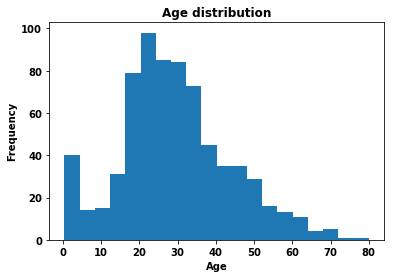

In [16]:
# get Age, ignore null values
age_data = np.array(titanic_df['Age'].dropna().values)

plt.hist(age_data, bins=20)
plt.title('Age distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

## Factors influencing survivability

### Does gender influence survivability?

The number of survivors in this sample is 342, approximately 38.4%. Of the 342 survivors, 233 (68.1%) are females. Given that there are more males than females on board, this is an interesting finding - because we expect the proportion of females that survive to be similar to the proportion of females on-board.

Average Survival Rate: 0.384


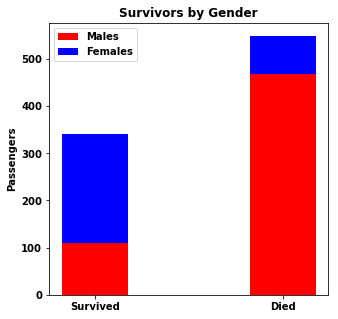

In [17]:
# average survival rate of this sample
survivors = titanic_df.query('Survived == 1')['Survived'].count()
average_survival =  survivors / titanic_df['PassengerId'].count()

print('Average Survival Rate: {:0.3f}'.format(average_survival))

# Bar plot of survivors by gender
N = 2
keyData = ('Survived', 'Died')
maleData = (109, 468)
femaleData = (233, 81)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(5,5))

p1 = plt.bar(ind, maleData, width, color='r')
p2 = plt.bar(ind, femaleData, width, color='b', bottom=maleData)

plt.ylabel('Passengers')
plt.title('Survivors by Gender')
plt.xticks(ind, keyData)
plt.legend((p1[0], p2[0]), ('Males', 'Females'))

plt.show()

### Does passenger class influence survivability?

There are 3 ticket classes - 1st, 2nd and 3rd. Analysing this in relation to survival below, it seems that passengers in the first class have higher survival rates and conversely, the largest proportion of those that did not survive were 3rd class passengers.

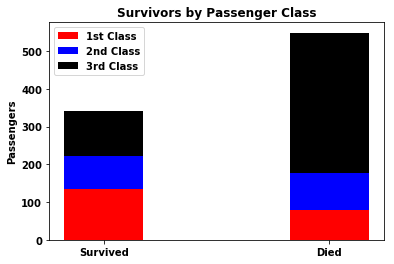

In [18]:
N = 2
keyData = ('Survived', 'Died')
fcData = np.array([136, 80])
scData = np.array([87, 97])
tcData = np.array([119, 372])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, fcData, width, color='r')
p2 = plt.bar(ind, scData, width, color='b', bottom=fcData)
p3 = plt.bar(ind, tcData, width, color='k', bottom=fcData+scData)

plt.ylabel('Passengers')
plt.title('Survivors by Passenger Class')
plt.xticks(ind, keyData)
plt.legend((p1[0], p2[0], p3[0]), ('1st Class', '2nd Class', '3rd Class'))

plt.show()

In [19]:
# average survival rates by passenger class

def passengers_by_class(Pclass):
    return titanic_df.query('Pclass == ' + str(Pclass))['PassengerId'].count()

def survivors_by_class(Pclass):
    return titanic_df.query('Survived == 1 and Pclass == ' + str(Pclass))['Survived'].count()

print('Survivors, 1st Class: {}, Survival rate: {:0.3f}'.format(survivors_by_class(1), survivors_by_class(1) / passengers_by_class(1)))
print('Survivors, 2nd Class: {}, Survival rate: {:0.3f}'.format(survivors_by_class(2), survivors_by_class(2) / passengers_by_class(2)))
print('Survivors, 3rd Class: {}, Survival rate: {:0.3f}'.format(survivors_by_class(3), survivors_by_class(3) / passengers_by_class(3)))


Survivors, 1st Class: 136, Survival rate: 0.630
Survivors, 2nd Class: 87, Survival rate: 0.473
Survivors, 3rd Class: 119, Survival rate: 0.242


The difference in survival can be explored by computing the survival rates 'scores' of each class. These findings are reasonably intuitive, noting that the higher the passenger class, the higher the survival rates.

### Does travel group size or number of family members influence survivability?

To analyze these 2 variables `Gsize` and `Fmem`, the survival rate corresponding to each group size (or number of family members) is computed as well.

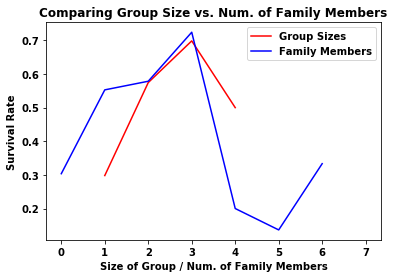

In [20]:
# calculate survival rates for each size, for both travel group and family
def get_survivability(column):
    return titanic_df[[column, 'Survived']].query('Survived == 1').groupby(column).count() / \
                titanic_df[[column, 'Survived']].groupby(column).count()
    
gsize_s_rates = get_survivability('Gsize')
fmem_s_rates = get_survivability('Fmem')

# plot survival rates

gs, = plt.plot(gsize_s_rates, color='r')
fm, = plt.plot(fmem_s_rates, color='b')
plt.xlabel('Size of Group / Num. of Family Members')
plt.ylabel('Survival Rate')
plt.title('Comparing Group Size vs. Num. of Family Members')
plt.legend([gs, fm], ['Group Sizes', 'Family Members'])
plt.show()

From the plot, it seems that survivability peaks at the same point, three for both group size and number of family members. It is also interesting to note that travelling alone (family members = 0, group size = 1), or having 4 or more family members on-board is associated with low survivability (less than 0.3).

### Does age influence survivability?

As `Age` has missing values, the analysis will be performed on a smaller data set without substituting the mean age.

Instead of using survival rates, a more visual approach is used to explore the number of passengers who survived and died at any particular age bin.

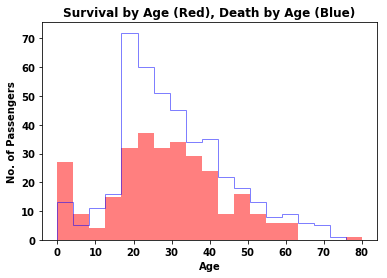

In [22]:
# plot stacked histogram

bins = np.linspace(0, 80, 20)

survived = titanic_df[titanic_df.Survived == 1]['Age'].dropna()
died = titanic_df[titanic_df.Survived == 0]['Age'].dropna()

plt.hist(survived.values, bins, color='r', alpha=0.5)
plt.hist(died.values, bins, color='b', alpha=0.5, histtype='step', stacked=True, fill=False)
plt.xlabel('Age')
plt.ylabel('No. of Passengers')
plt.title('Survival by Age (Red), Death by Age (Blue)')
plt.show()

The histogram plot shows that survivors outnumber deaths at ages under 8. Survivability was low for all other ages and exceptionally low for the ages 20-28. This goes against common sense, because we would expect that children be less capable of surviving a disaster, compared to a young adult.

While this shows that `Age` may not be a predictor of survivability in this case, it is interesting to note that the Titanic had limited rescue boats, and priority was given instead to those who were less capable of survival - i.e. young children.

## Conclusion

### Limitations

As these results were based on a sample - it would be more accurate against the full data set. These analyses could be further corroborated with formal statistical testing.

### Wrap Up

In this report, we have explored a subset of Titanic passenger data, beginning with a general exploration of the passengers' gender, class and fares. It was also at this stage that it was recognised that the passengers could be  clustered for further analysis.

Of the subsequent questions that were answered for survivability, some interesting results were obtained. First, it is more likely that a woman or child survived than for a male or adult person. And, that traveling as a group or having family members on board seems to correlate with increased chances of survival. Some results were obvious, like, the higher the passenger class, the survival rates increase.